# Capston Project- The Battle of Neighborhood - week 2

## Introduction: Business Problem 

In this project I will try to answer the question : If living in Toronto is affordable for a younge immigrant.
    
I will find the " Living expences in Toronto" and break it down to different expences, find the big portions.

Then I will analyse the data to see if there is a way to reduce the expenses to make it affordable for low-income

younge persons.

New immigrants or students who is thinking of starting a new life in Canada and specificly Toronto will benefit the

result. 

# Living cost in Toronto

Using Beautifulsoup, we extract data

### Libraries

In [10]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [19]:
#Getting data from a website using Beautifulsoup 

url='https://dailyhive.com/toronto/toronto-millennial-cost-living-2018'
result= requests.get(url)
soup= BeautifulSoup(result.text,'lxml')
#print(soup)

In [20]:
#creating a panda Dataframe

df_cost_tor=pd.DataFrame(columns={"Expence_tor","Cost_tor"})

In [21]:
#finding the numbers of "ul" in soup

ul_list=soup.find_all('ul')
len(ul_list)

11

In [22]:
# finding the "ul" we need to get the data
ul_list[6]

<ul>
<li>
<b>Housing:</b> $1,672.13</li>
<li>
<b>Phone and Internet:</b> $127.50</li>
<li>
<b>Transportation:</b> $176.25</li>
<li>
<b>Groceries:</b> $283.60</li>
<li>
<b>Entertainment:</b> $354</li>
<li>
<b>Fitness:</b> $75</li>
<li>
<b>Insurance:</b> $52</li>
</ul>

In [23]:
# Getting data and store it in a data Frame

#article=soup.find('div', class_='post content toronto')
            
ul_list=soup.find_all('ul')

container=ul_list[6]

for li in container.find_all('li'):
      
    expence =li.text.split(':')[0].strip()
    cost = li.text.split(':')[1].split('$')[1].replace(',','')
   
    #print(expence)
    #print(cost)
    
    df_cost_tor = df_cost_tor.append({"Expence_tor": expence ,"Cost_tor": cost},ignore_index=True)  
            
df_cost_tor     

,Cost_tor,Expence_tor
0,1672.13,Housing
1,127.50,Phone and Internet
2,176.25,Transportation
3,283.60,Groceries
4,354,Entertainment
5,75,Fitness
6,52,Insurance


In [24]:
# changing str format to float for analysis and charts

df_cost_tor["Cost_tor"] = df_cost_tor.Cost_tor.astype(float)
df_cost_tor

,Cost_tor,Expence_tor
0,1672.13,Housing
1,127.50,Phone and Internet
2,176.25,Transportation
3,283.60,Groceries
4,354.00,Entertainment
5,75.00,Fitness
6,52.00,Insurance


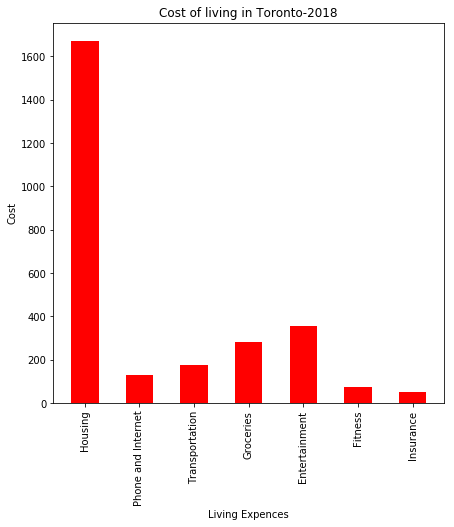

In [10]:
# bar chart - expences in Toronto

fig=plt.figure(figsize=(7,7))

X1= df_cost_tor["Expence_tor"]
Y1= df_cost_tor["Cost_tor"]
position=[0,1,2,3,4,5,6]

plt.bar(X1,Y1,width=0.5,color='red')
plt.xticks(rotation=90)
plt.xlabel("Living Expences")
plt.ylabel("Cost")
plt.title("Cost of living in Toronto-2018")
plt.show()

This is a bar plot showing Expences, as we can see Housing expence is the highest amoung the expences.
So, we check renting prices in Toronto to explore this expence more.

In [25]:
# getting data and put it in a data Frame.

df = pd.read_csv(r'C:\Users\Javad\Documents\Datasets\Toronto Apartment Rental Price.csv')

nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head(5)

There are 1124 rows and 7 columns


,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"


In [26]:
# drop " address" column as it is categorical and we dont need it.

df_k=df.drop(["Address"], axis=1)
df_k.head()

,Bedroom,Bathroom,Den,Lat,Long,Price
0,2,2.0,0,43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,43.652487,-79.389622,"$1,800.00"


## Cleaning data

In [27]:
#Removing '$' and ',' from Prices 
df_k['Price']=[df['Price'][i].split('$')[1].replace(',','') for i in df_k.index]
P=df_k['Price']

In [28]:
# Change the format of Column Price from obj to float
#P=df_k['Price']
df_k['Price']=pd.to_numeric(P) 
df_k['Price'].dtype

dtype('float64')

In [29]:
#Eliminating Lat and Long of the other cities
df_ana = df_k[(df['Lat'] > 43 ) & (df_k['Lat'] < 44)]
df_ana.head()

,Bedroom,Bathroom,Den,Lat,Long,Price
0,2,2.0,0,43.581639,-79.648193,2450.0
1,1,1.0,1,43.643051,-79.391643,2150.0
2,1,1.0,0,43.660605,-79.378635,1950.0
3,2,2.0,0,43.641087,-79.381405,2900.0
4,1,1.0,0,43.652487,-79.389622,1800.0


In [30]:
#Eliminating houses with price >= 700 and <= 4000
df_ana = df_ana[(df_ana['Price'] >= 700) & (df_ana['Price'] < 4000)]
df_ana.head()

,Bedroom,Bathroom,Den,Lat,Long,Price
0,2,2.0,0,43.581639,-79.648193,2450.0
1,1,1.0,1,43.643051,-79.391643,2150.0
2,1,1.0,0,43.660605,-79.378635,1950.0
3,2,2.0,0,43.641087,-79.381405,2900.0
4,1,1.0,0,43.652487,-79.389622,1800.0


### using Describe  method to see the distribution of data and get more information

In [31]:
df_ana.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,1.355410,1.223414,0.157649,43.657133,-79.406062,2142.880597
std,0.535908,0.416448,0.364582,0.098463,0.184047,579.203510
min,1.000000,1.000000,0.000000,43.104126,-80.247383,700.000000
25%,1.000000,1.000000,0.000000,43.641087,-79.413408,1779.750000
50%,1.000000,1.000000,0.000000,43.650332,-79.387295,2100.000000
75%,2.000000,1.000000,0.000000,43.665588,-79.376994,2456.250000
max,3.000000,3.000000,1.000000,43.971005,-78.157735,3999.000000


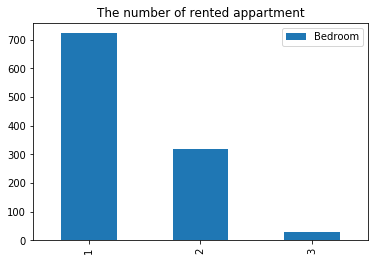

In [32]:
qtHouses = pd.DataFrame(df_ana['Bedroom'].value_counts())
qtHouses.sort_values(by='Bedroom')
qtHouses[0:50].plot(kind='bar', title='The number of rented appartment')

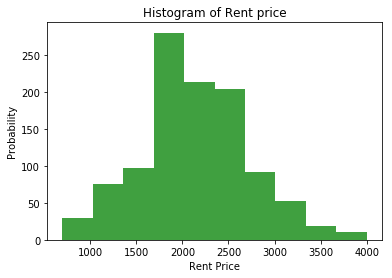

In [33]:
import numpy as np
import matplotlib.pyplot as plt

y= df_ana['Price']

# the histogram of the data
n, bins, patches = plt.hist(y, 10, facecolor='g', alpha=0.75)  


plt.xlabel('Rent Price')
plt.ylabel('Probability')
plt.title('Histogram of Rent price')

plt.show()

# Machine Learning Algorithms
## KNN

## split the data set 

In [40]:
# loading libraries
import numpy as np

from sklearn.model_selection import train_test_split
# define Data
X = df_ana
y=df_ana['Price']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Finding the Best K

In [43]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94915254, 0.92655367, 0.88983051, 0.86723164, 0.83333333,
       0.8220339 , 0.81355932, 0.81073446, 0.80225989])

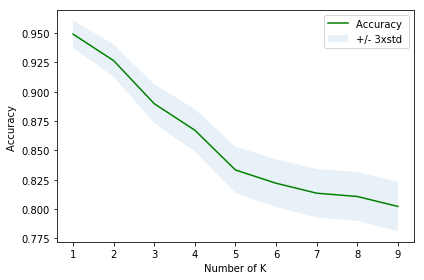

In [149]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

## Training the model and Evaluation

using the best k we found to evaluate the model

In [45]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.8333333333333334


Research shows that there are a list of Hot cities for live in Canada in 2018. Here are the cities:

![title](https://images.dailyhive.com/20180115101245/Screen-Shot-2018-01-15-at-10.01.11-AM.png)

## Forsquare 

Using Forsquare, we will compare Toronto and the best city of the list of " Hot Cities".
As for Quebec , language might be a problem, we will chose the second city in the list , Victoria , BC.

## 1-Toronto - ON

Checking Venues and their categories in Toronto-ON.

Passing Forsquare Credential:

In [46]:
CLIENT_ID ='EC2QW5CRSKB1S3V02LMSPC23PD0GZ4YZCMCU101EYCJ2I0IN' # your Foursquare ID
CLIENT_SECRET ='GLTKTQCJNMYWADWDVKN2IBEUCLAHU3EH1ZZXWBX20WAJH51X' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EC2QW5CRSKB1S3V02LMSPC23PD0GZ4YZCMCU101EYCJ2I0IN
CLIENT_SECRET:GLTKTQCJNMYWADWDVKN2IBEUCLAHU3EH1ZZXWBX20WAJH51X


Finding Lat and Long of Toronto:

In [47]:
from geopy.geocoders import Nominatim
address = 'Toronto , ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


Checking Venues and location base on " Turkish " Search

In [48]:
search_query= 'Turkish'
radius =500

In [49]:
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?client_id=EC2QW5CRSKB1S3V02LMSPC23PD0GZ4YZCMCU101EYCJ2I0IN&client_secret=GLTKTQCJNMYWADWDVKN2IBEUCLAHU3EH1ZZXWBX20WAJH51X&ll=43.653963,-79.387207&v=20180604&radius=500&limit=30'

In [50]:
import requests

results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '5cdc5fee1ed21914beead16a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 77,
  'suggestedBounds': {'ne': {'lat': 43.6584630045, 'lng': -79.38099903084075},
   'sw': {'lat': 43.649462995499995, 'lng': -79.39341496915925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          

In [51]:
items1 = results['response']['groups'][0]['items']
items1[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5227bb01498e17bf485e6202',
  'name': 'Downtown Toronto',
  'location': {'lat': 43.65323167517444,
   'lng': -79.38529600606677,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.65323167517444,
     'lng': -79.38529600606677}],
   'distance': 174,
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['Toronto ON', 'Canada']},
  'categories': [{'id': '4f2a25ac4b909258e854f55f',
    'name': 'Neighborhood',
    'pluralName': 'Neighborhoods',
    'shortName': 'Neighborhood',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-5227bb01498e17bf485e6202-0'}

In [91]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [92]:
dataframe1 = json_normalize(items1) # flatten JSON

filtered_columns_T = ['venue.name', 'venue.categories']
dataframe_filtered_T = dataframe1.loc[:, filtered_columns_T]

dataframe_filtered_T['venue.categories'] = dataframe_filtered_T.apply(get_category_type, axis=1)
#dataframe_filtered_T['venue.categories'] = dataframe_filtered_T.apply(get_category_type, axis=1)

dataframe_filtered_T.columns = [col.split('.')[-1] for col in dataframe_filtered_T.columns]


dataframe_filtered_T.head()


,name,categories
0,Downtown Toronto,Neighborhood
1,Textile Museum of Canada,Art Museum
2,Sansotei Ramen 三草亭,Ramen Restaurant
3,Cafe Plenty,Café
4,Tsujiri,Tea Room


## 2- Victoria- BC

Checking venues and their categories in Victoria- BC

In [94]:
from geopy.geocoders import Nominatim
address2 = 'Victoria , BC'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address2)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.4283182 -123.3649533


In [95]:
search_query= 'Turkish'
radius =500

In [96]:
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/explore?client_id=EC2QW5CRSKB1S3V02LMSPC23PD0GZ4YZCMCU101EYCJ2I0IN&client_secret=GLTKTQCJNMYWADWDVKN2IBEUCLAHU3EH1ZZXWBX20WAJH51X&ll=48.4283182,-123.3649533&v=20180604&radius=500&limit=30'

In [97]:
import requests

results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5cdc66311ed21914bbf51bfa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chinatown',
  'headerFullLocation': 'Chinatown, Victoria',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 116,
  'suggestedBounds': {'ne': {'lat': 48.4328182045, 'lng': -123.3581843176504},
   'sw': {'lat': 48.4238181955, 'lng': -123.3717222823496}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b75bebbf964a52076212ee3',
       'name': 'Café Bliss',
       'location': {'address': '556 Pandora Ave.',
        'crossStreet': 'at Government St.',
        'lat': 48.428598247729774,
        'lng': -123.36756571461734,
        'labeledLatLngs': [{'label': '

In [98]:
items2 = results2['response']['groups'][0]['items']
items2[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b75bebbf964a52076212ee3',
  'name': 'Café Bliss',
  'location': {'address': '556 Pandora Ave.',
   'crossStreet': 'at Government St.',
   'lat': 48.428598247729774,
   'lng': -123.36756571461734,
   'labeledLatLngs': [{'label': 'display',
     'lat': 48.428598247729774,
     'lng': -123.36756571461734}],
   'distance': 195,
   'postalCode': 'V8W 1N7',
   'cc': 'CA',
   'city': 'Victoria',
   'state': 'BC',
   'country': 'Canada',
   'formattedAddress': ['556 Pandora Ave. (at Government St.)',
    'Victoria BC V8W 1N7',
    'Canada']},
  'categories': [{'id': '4bf58dd8d48988d1d3941735',
    'name': 'Vegetarian / Vegan Restaurant',
    'pluralName': 'Vegetarian / Vegan Restaurants',
    'shortName': 'Vegetarian / Vegan',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
     'suffix': '.png'},
  

In [100]:
dataframe2 = json_normalize(items2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories'] + [col for col in dataframe2.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_V = dataframe2.loc[:, filtered_columns2]

# filter the category for each row
dataframe_filtered_V['venue.categories'] = dataframe_filtered_V.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_V.columns = [col.split('.')[-1] for col in dataframe_filtered_V.columns]

dataframe_filtered_V.head(5)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Café Bliss,Vegetarian / Vegan Restaurant,556 Pandora Ave.,CA,Victoria,Canada,at Government St.,195,"[556 Pandora Ave. (at Government St.), Victori...","[{'label': 'display', 'lat': 48.42859824772977...",48.428598,-123.367566,NaN,V8W 1N7,BC,4b75bebbf964a52076212ee3
1,Brasserie l'École,French Restaurant,1715 Government St.,CA,Victoria,Canada,btwn Fisgard St & Herald St,220,[1715 Government St. (btwn Fisgard St & Herald...,"[{'label': 'display', 'lat': 48.42969825170819...",48.429698,-123.367095,NaN,V8W 1Z4,BC,4b5667b6f964a520050f28e3
2,MEC Victoria,Sporting Goods Shop,1450 Government St,CA,Victoria,Canada,at Johnson St,180,"[1450 Government St (at Johnson St), Victoria ...","[{'label': 'display', 'lat': 48.42784043587051...",48.427840,-123.367289,NaN,V8W 1Z2,BC,4b7713bbf964a520ed7a2ee3
3,The Mint,Tapas Restaurant,1414 Douglas St,CA,Victoria,Canada,NaN,90,"[1414 Douglas St, Victoria BC, Canada]","[{'label': 'display', 'lat': 48.42751830233713...",48.427518,-123.364767,NaN,NaN,BC,4b5a719af964a5207ac528e3
4,Lotus Pond,Vegetarian / Vegan Restaurant,617 Johnson Street,CA,Victoria,Canada,Broad Street,150,"[617 Johnson Street (Broad Street), Victoria B...","[{'label': 'display', 'lat': 48.42739892233043...",48.427399,-123.366451,NaN,V8W 1M5,BC,4be3ce03cbdbef3b59a360d8


In [101]:
dataframe2 = json_normalize(items2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories'] 
dataframe_filtered_V = dataframe2.loc[:, filtered_columns2]
dataframe_filtered_V['venue.categories'] = dataframe_filtered_V.apply(get_category_type, axis=1)

dataframe_filtered_V.columns = [col.split('.')[-1] for col in dataframe_filtered_V.columns]

dataframe_filtered_V.head()

,name,categories
0,Café Bliss,Vegetarian / Vegan Restaurant
1,Brasserie l'École,French Restaurant
2,MEC Victoria,Sporting Goods Shop
3,The Mint,Tapas Restaurant
4,Lotus Pond,Vegetarian / Vegan Restaurant


Result of Forsquare serach , shows Categories of Venues we can find in both cities.
We put the result in 2 Data frames as below:


In [166]:
Victoria = dataframe_filtered_V.categories.unique()
df_Victoria =pd.DataFrame(data = Victoria , columns={"Categories":Victoria})
df_Victoria

,Categories
0,Vegetarian / Vegan Restaurant
1,French Restaurant
2,Sporting Goods Shop
3,Tapas Restaurant
4,Coffee Shop
5,Tea Room
6,Sandwich Place
7,Lounge
8,Gaming Cafe
9,Breakfast Spot


In [144]:
Toronto= dataframe_filtered_T.categories.unique()
df_Toronto =pd.DataFrame(data = Toronto , columns={"Categories":Toronto})
df_Toronto

,Categories
0,Neighborhood
1,Art Museum
2,Ramen Restaurant
3,Café
4,Tea Room
5,Sushi Restaurant
6,Poke Place
7,Japanese Restaurant
8,Arts & Crafts Store
9,Plaza


# Conclusion and Recomendation

## Conclusion

Both cities have a lot of Venues in common, we can choose a city based on our interest of job or activities.

By looking at the result and considering my friend study and interest to Art, I recommended Toronto to her. 



## Recomendation

If she takes my advice and move to Toronto, she still can bring the cost down by doing the following:
    •Renting with friends or a co-worker- Consider finding a roommate to slash your rent by 50% or more.
    •Avoid the flashy areas– In most large cities, the rental opportunities are endless. And since they are in-demand,
    they are likely to cost more. Try to avoid those “flashy” areas and try to find a place that’s a few blocks away.
